# Текст для опрацювання

The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound.


# SpaCy
(Matthias Gehringer)

In [120]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [79]:
text = 'The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound.'

In [80]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Видаляємо стоп-слова
tokens = [token.text for token in doc if not token.is_stop]

In [81]:
print(len(tokens))
tokens[:7] # more than 7 values in a column

335


['Orbiter', 'Discovery', ',', 'OV-103', ',', 'considered', 'eligible']

In [82]:
# Рахуємо важливість кожного речення спираючись на вектора слів
# sentence_importance = {}
# for sentence in doc.sents:
#     for word in sentence:
#         if word.text.lower() not in nlp.Defaults.stop_words:
#             if sentence in sentence_importance.keys():
#                 sentence_importance[sentence] += word.vector_norm
#             else:
#                 sentence_importance[sentence] = word.vector_norm

sentence_importance = {}
for sentence in doc.sents:
  unique_words = set([word.text.lower() for word in sentence if word.text.lower() not in STOP_WORDS])
  sentence_importance[sentence] = len(unique_words)

In [83]:
sentences = list(doc.sents)

In [121]:
# топ-3 важливих речення
summary_sentences = sorted(sentence_importance, key=sentence_importance.get, reverse=True)[:3]

summary = ""
for sentence in summary_sentences:
    summary += str(sentence).strip() + " "

summary_sentences_count = len(summary_sentences)
print("Кількість речень у вибірці:", summary_sentences_count)

summary

Кількість речень у вибірці: 3


'The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. '

In [85]:
# три перші речення
# first_three_sentences = list(sentence_importance.keys())[:3]

# for sentence in first_three_sentences:
#     print(sentence)

In [86]:
# три перші речення
print('Total number of sentences:', len(sentences))
sentences[:3]

Total number of sentences: 17


[The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.,
 Because it has achieved significance within the past fifty years, Criteria Consideration G applies.,
 Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA.]

In [88]:
def get_sentence_importance(sentence, stop_words):
    if isinstance(sentence, str):
        doc = nlp(sentence)
        unique_words = set([word.text.lower() for word in doc if word.text.lower() not in stop_words])
    else:
        unique_words = set([word.text.lower() for word in sentence if word.text.lower() not in stop_words])
    return len(unique_words)

def get_sentence_ranks(text, n_sentences=3, importance=False):
    # Видаляємо стоп-слова
    stop_words = set(STOP_WORDS)

    # Видаляємо порожні рядки
    # text = re.sub(r'\n\s*\n+', '\n', text)
    text = '\n'.join([line for line in text.split('\n') if line.strip()])

    # Рахуємо важливість речення
    sentence_importance = {}
    sentences = list(nlp(text).sents)  # Зберігаємо порядок речень
    for sentence in sentences:
        sentence_importance[sentence] = get_sentence_importance(sentence, stop_words)

    # Сортуємо речення
    sorted_sentences = sorted(sentence_importance, key=sentence_importance.get, reverse=True)

    # Створюємо матрицю рангів
    sentence_ranks = []
    for i, sentence in enumerate(sorted_sentences):
      if importance:
        importance_score = sentence_importance[sentence]
        sentence_ranks.append([i + 1, sentence, sentences.index(sentence) + 1, importance_score])
      else:
        sentence_ranks.append([i + 1, sentence, sentences.index(sentence) + 1])

    return sentence_ranks

sentence_ranks = get_sentence_ranks(text, n_sentences=3, importance=True)

for rank, sentence, original_index, importance in sentence_ranks:
  print(f'Ранг {rank} - Важливість: {importance} - (номер речення {original_index}): {sentence}')
print('Total number of sentences:', len(sentences))

Ранг 1 - Важливість: 30 - (номер речення 1): The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.
Ранг 2 - Важливість: 28 - (номер речення 13): According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.”
Ранг 3 - Важливість: 28 - (номер речення 14): Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials.
Ранг 4 - Важливість: 24 - (номер речення 3): Under 

In [89]:
stop_words = set(STOP_WORDS)
stop_words_list = list(stop_words)
stop_words_list[:20]

['doing',
 'it',
 'during',
 'thence',
 'whenever',
 'beyond',
 'nowhere',
 'at',
 'toward',
 'somehow',
 'seem',
 'between',
 'and',
 'could',
 'ten',
 'here',
 '‘ll',
 'a',
 'sometimes',
 'towards']

# NLTK

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Частота вживаних слів

In [91]:

# Токенізація
doc = nlp(text)
tokens = [token.text for token in doc]
print("Кількість токенів:", len(tokens))
tokens[:7] # more than 7 values in a column

Кількість токенів: 539


['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is']

In [92]:
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
stop_words = set(stopwords.words('english'))


In [93]:
# punctuation = string.punctuation + '\n'
tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]

In [94]:
tokens_without_punctuation[:7]

['The', 'Orbiter', 'Discovery', 'OV-103', 'is', 'considered', 'eligible']

In [95]:
# порахувати частоту слів у тексті(робити, вже виключивши усі знаки пунктуації)
word_frequencies = {}
for word in tokens_without_punctuation:
    if word.lower() not in stop_words:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1


In [96]:
# частота вживаних слів
list(word_frequencies.items())[:20]

[('Orbiter', 1),
 ('Discovery', 7),
 ('OV-103', 1),
 ('considered', 1),
 ('eligible', 1),
 ('listing', 1),
 ('National', 1),
 ('Register', 1),
 ('Historic', 1),
 ('Places', 1),
 ('NRHP', 1),
 ('context', 1),
 ('U.S.', 2),
 ('Space', 10),
 ('Shuttle', 6),
 ('Program', 2),
 ('1969-2011', 1),
 ('Criterion', 4),
 ('areas', 1),
 ('Exploration', 1)]

In [97]:
# сортуємо за спаданням
list(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True))[:20]

[('Space', 10),
 ('first', 10),
 ('Discovery', 7),
 ('Shuttle', 6),
 ('orbiter', 6),
 ('Criterion', 4),
 ('missions', 4),
 ('space', 3),
 ('flew', 3),
 ('also', 3),
 ('fly', 3),
 ('reusable', 3),
 ('U.S.', 2),
 ('Program', 2),
 ('C', 2),
 ('significant', 2),
 ('vehicles', 2),
 ('SSP', 2),
 ('five', 2),
 ('orbiters', 2)]

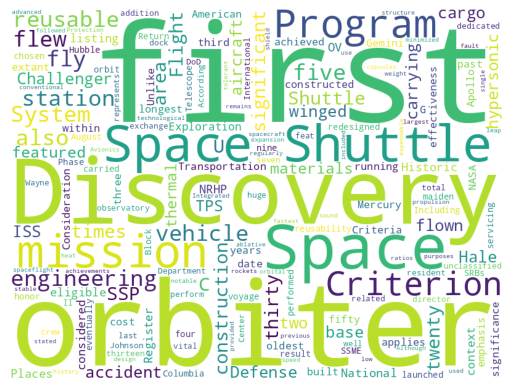

In [118]:
wc = WordCloud(width=800, height=600, background_color="white", stopwords=stop_words)

wc.generate(text)

plt.imshow(wc)
plt.axis("off")
plt.show()

# Бібліотека heapq

найважливіші речення з тексту

In [98]:
from heapq import nlargest

In [99]:
# Розрахунок важливість речень
sentence_scores = {}
for sentence in sentences:
    sentence_scores[sentence] = get_sentence_importance(sentence, stop_words)

# Необхідна кількість речень
# select_length = len(sentences)
n_elements = 3

# Найбільша кількість елементів у словнику sentence_scores
# summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary = nlargest(n_elements, sentence_scores, key=sentence_scores.get)

summary

['According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials.',
 'The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.',
 'Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space

In [100]:
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

for sentence, importance in sorted_sentences:
    print(f"Речення: {sentence}\nВажливість: {importance}\n")

Речення: According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials.
Важливість: 53

Речення: The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.
Важливість: 30

Речення: Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle 

# **Висновки**


Для фрмування текстового резюме вибрано 3 (три) найбільш вживаних речення. Вживаність речень визначена за частототою слів.

Викорисатнням бібліотек NLTK та SpaCy показали однаковий результат у виявлені важливих речень, хоча розмір вагів розраховувався по різному.

Автоматичне формування текстового резюме може бути корисним інструментом для швидкого розуміння основних моментів довгого тексту.

# Контрольна перевірка елементів текстових резюме

на відмінність отриманих результатів з методом без часткового застосування інструментаріїв бібліотеки для NLP: nltk та SpaCy

Алгоритм повторює логіку розбиття (тексту на речення) на токени в стандартній бібліотеці SpaCy

In [101]:

def split_text_into_sentences(text):
  """
  Розбиває текст на речення за допомогою spaCy.
  """
  doc = nlp(text) # потрібно додати nlp = spacy.load("en_core_web_sm")
  sentences = []
  sentence = ""
  for token in doc:
    # Додаємо слово до речення
    sentence += token.text + " "
    # Наявність крапки в кінці речення
    if token.text.endswith("."):
      # Видаляємо пробіл після крапки
      sentence = sentence[:-1]
      # Додаємо речення до списку
      sentences.append(sentence)
      # Очищаємо речення для наступного
      sentence = ""
  # Додаємо останнє речення
  if sentence:
    sentences.append(sentence)
  return sentences


sentences = split_text_into_sentences(text)

for sentence in sentences:
  print(sentence + "\n")


The Orbiter Discovery , OV-103 , is considered eligible for listing in the National Register of Historic Places ( NRHP ) in the context of the U.S.

Space Shuttle Program ( 1969 - 2011 ) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering .

Because it has achieved significance within the past fifty years , Criteria Consideration G applies .

Under Criterion A , Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program ( SSP ) , the longest running American space program to date ; she was the third of five orbiters built by NASA .

Unlike the Mercury , Gemini , and Apollo programs , the SSP ’s emphasis was on cost effectiveness and reusability , and eventually the construction of a space station .

Including her maiden voyage ( launched August 30 , 1984 ) , Discovery flew to space thirty - nine times , more than any of the other four orbiters ; she was also th

Частота вживаних слів без використання стоп-слів з бібліотек NLP

In [102]:
from collections import Counter
import string

# Видалення пунктуації і розділення тексту на слова
words = text.split()
words = [word.strip(string.punctuation) for word in words]

# Рахуємо частоту слів
word_frequencies = Counter(words)

# list(word_frequencies.items())[:20]
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_word_frequencies[:20]

[('the', 43),
 ('of', 18),
 ('to', 15),
 ('and', 14),
 ('a', 11),
 ('Space', 10),
 ('first', 10),
 ('Discovery', 7),
 ('Shuttle', 6),
 ('orbiter', 6),
 ('was', 6),
 ('in', 5),
 ('as', 5),
 ('for', 4),
 ('Criterion', 4),
 ('she', 4),
 ('her', 4),
 ('missions', 4),
 ('is', 3),
 ('space', 3)]

Візуалізація

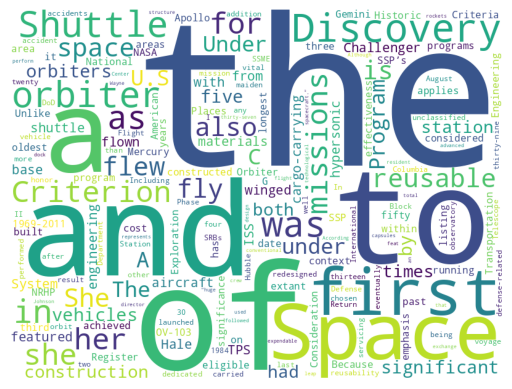

In [119]:
wc = WordCloud(width=800, height=600, background_color="white")

wc.generate_from_frequencies(word_frequencies)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# vocab = {}

# for token in doc:
#     if token.text not in vocab.keys():
#       vocab[token.text] = 1
#     else:
#       vocab[token.text] += 1;

# for token in doc:
#       print(token.text, token.pos_, vocab[token.text])